In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import  RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from nltk.corpus import stopwords
import nltk

# Load the CSV file with specified encoding
df = pd.read_csv(r"C:\Users\abdel\Downloads\data set\SQLiV3.csv")

In [2]:
print(df.columns)
for i in range(0, 20921):
    if pd.isnull(df.iloc[i, 0]):
        df.iloc[i, 0] = df.iloc[i, 1]
    elif pd.isnull(df.iloc[i, 1]):
        df.iloc[i, 1] = df.iloc[i, 2]
print(df.isna().sum())
print(df.head())


# Convert 'Label' column to string and then check for non-numeric characters
df['Label'] = df['Label'].astype(str)
df = df[~df['Label'].str.contains('[a-zA-Z]')]
# Convert the 'Label' column to integers
df['Label'] = pd.to_numeric(df['Label'], errors='coerce', downcast='integer')
df['Label'] = df['Label'].astype('float32')
# Drop rows with NaN values in 'Sentence' and 'Label' columns
df = df.dropna(subset=['Sentence', 'Label'])

# Check for NaN values after cleaning
print(df.isna().sum())

print(df.isna().sum())
print(df.head())
# Extract features and labels
X = df['Sentence']
y = df['Label']

# Apply CountVectorizer to convert text data into numerical features
vectorizer = CountVectorizer(min_df=2, max_df=0.8, stop_words=stopwords.words('english'))
X = vectorizer.fit_transform(X.astype('U')).toarray()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=44)

Index(['Sentence', 'Label', 'Unnamed: 2', 'Unnamed: 3'], dtype='object')
Sentence          1
Label             0
Unnamed: 2    30916
Unnamed: 3    31209
dtype: int64
                                            Sentence Label Unnamed: 2  \
0                  " or pg_sleep  (  __TIME__  )  --     1        NaN   
1  create user name identified by pass123 tempora...     1          1   
2   AND 1  =  utl_inaddr.get_host_address   (    ...     1        NaN   
3   select * from users where id  =  '1' or @ @1 ...     1        NaN   
4   select * from users where id  =  1 or 1#"  ( ...     1        NaN   

   Unnamed: 3  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN  
Sentence          0
Label             0
Unnamed: 2    30911
Unnamed: 3    31166
dtype: int64
Sentence          0
Label             0
Unnamed: 2    30911
Unnamed: 3    31166
dtype: int64
                                            Sentence  Label Unnamed: 2  \
0                  " or pg_sleep  (  __

In [3]:
RandomForestClassifier=RandomForestClassifier(n_estimators=200,max_depth=100,random_state=42)
RandomForestClassifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred =RandomForestClassifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("DecisionTree", f'Accuracy: {accuracy}')
training_Accuracy=RandomForestClassifier.score(X_train,y_train)
print("DecisionTree training ",f'Accuracy: {training_Accuracy}')

DecisionTree Accuracy: 0.9351482741857073
DecisionTree training  Accuracy: 0.9341985537091135


[1. 0.]


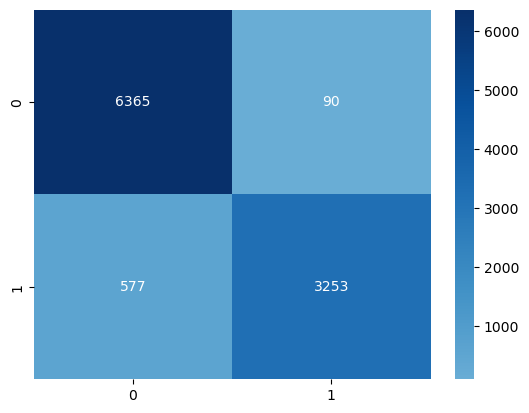

In [4]:
import seaborn as sns
import matplotlib as plt
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', center=True)
print(df['Label'].unique())